In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [6]:
# DSND colors: UBlue, Salmon, Gold, Slate
plot_colors = ['#02b3e4', '#ee2e76', '#ffb613', '#2e3d49']

# Light colors: Blue light, Salmon light
plot_lcolors = ['#88d0f3', '#ed8ca1', '#fdd270']

# Gray/bg colors: Slate Dark, Gray, Silver
plot_grays = ['#1c262f', '#aebfd1', '#fafbfc']

In [7]:
from matplotlib.colors import LinearSegmentedColormap

# colormap from UBlue - Gold - Salmon
cdict = {'red'  : [(0.0, 0.007843, 0.007843),
                   (0.5, 1.0     , 1.0     ),
                   (1.0, 0.933333, 0.933333)],
         'green': [(0.0, 0.701961, 0.701961),
                   (0.5, 0.713725, 0.713725),
                   (1.0, 0.180392, 0.180392)],
         'blue' : [(0.0, 0.894118, 0.894118),
                   (0.5, 0.074510, 0.074510),
                   (1.0, 0.462745, 0.462745)]}
plot_cmap = LinearSegmentedColormap('DSND', cdict)

## C6.01: Introduction

In [8]:
from sklearn.datasets import make_blobs

n_clusters = 2
centers = [[-1,-1],[1,1]]
stdevs = [0.4, 0.6]
X, y = make_blobs(n_samples = 20, centers = centers, cluster_std = stdevs, random_state = 1200000)

In [9]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = n_clusters)
preds = model.fit_predict(X)

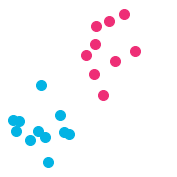

In [10]:
plt.figure(figsize = [3,3])

for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
    my_members = (preds == k)
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 100, c = col)

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_visible(False) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C01_TypesOfUL_01.png', transparent = True)

In [11]:
n_points = 10
X = np.random.RandomState(1800000).multivariate_normal([0,0], [[1,0.8],[0.8,1]], n_points)

In [12]:
model = PCA()
model.fit_transform(X)

pc1 = model.components_[0,:]
X_center = X.mean(axis=0)
X_new = np.matmul( np.dot(X - X_center, pc1).reshape(-1,1), pc1.reshape(1,-1) ) + X_center

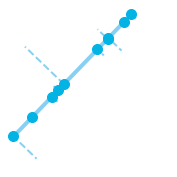

In [13]:
plt.figure(figsize = [3,3])

plt.scatter(X[:,0], X[:,1], s = 100, c = '#ffffff')
plt.plot([X_new[:,0].min(), X_new[:,0].max()],  [X_new[:,1].min(), X_new[:,1].max()],
         '-', c = plot_lcolors[0], lw = 4, zorder = 0)
plt.scatter(X_new[:,0], X_new[:,1], s = 100, c = plot_colors[0])
for x, x_new in zip(X, X_new):
    plt.plot([x[0],x_new[0]], [x[1],x_new[1]], '--', c = plot_lcolors[0], lw = 2, zorder = 0)

plt.xticks([])
plt.yticks([])
ax = plt.gca()
[side.set_visible(False) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C01_TypesOfUL_02.png', transparent = True)

## C6.09: Dimensionality Reduction

In [14]:
n_points  = [4, 7, 9, 9, 7, 4]
n_rooms   = [3, 4, 5, 6, 7, 8]
size_lower = [ 600,  800, 1000, 1300, 1600, 2000]
size_upper = [1000, 1300, 1600, 2000, 2400, 3000]

np.random.seed(147258369)

rooms = []
sizes = []
for i in range(6):
    # use beta dist to generate sizes, find bounds with
    # lower @ 0.2, upper @ 0.8.
    size_range = size_upper[i] - size_lower[i]
    size_min = size_lower[i] - size_range / 3
    
    rooms.append(np.repeat([n_rooms[i]], n_points[i]))
    sizes.append(size_min + size_range * np.random.beta(5, 5, n_points[i]))

X = np.hstack([np.hstack(rooms).reshape(-1,1), np.hstack(sizes).round().reshape(-1,1)])

In [15]:
X = StandardScaler().fit_transform(X)

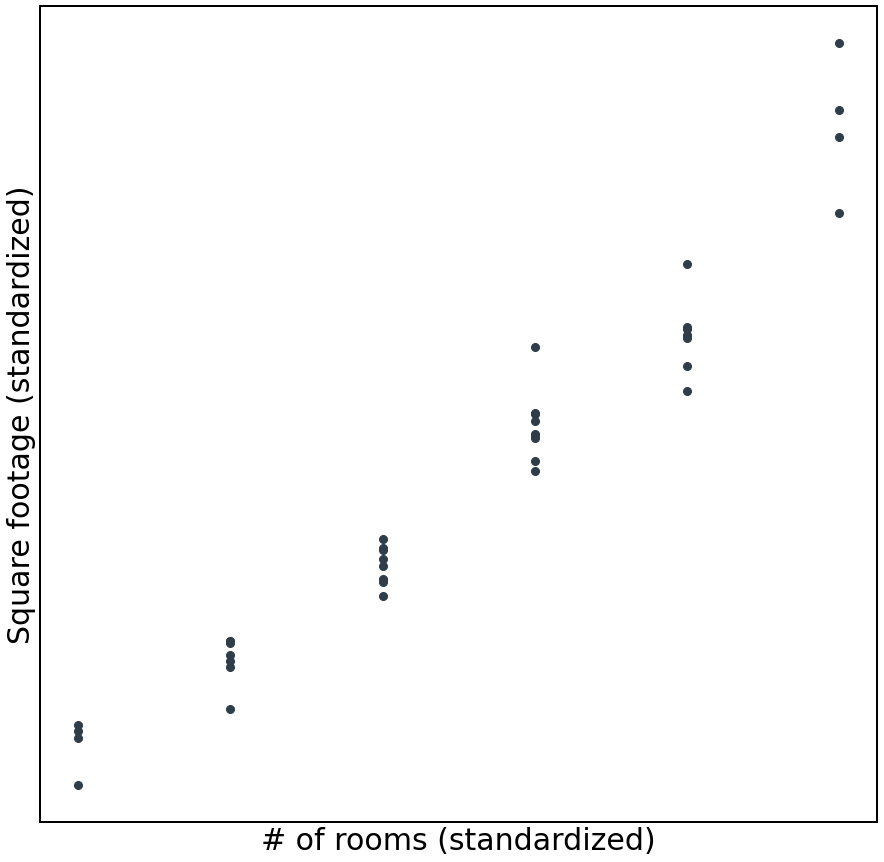

In [16]:
plt.figure(figsize = [15,15])

plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])

plt.xticks([])
plt.yticks([])
plt.xlabel('# of rooms (standardized)', fontsize = 30)
plt.ylabel('Square footage (standardized)', fontsize = 30)
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
# plt.axis('square')
plt.savefig('C09_DimensReduct_01.png', transparent = True)

In [17]:
pca_model = PCA()
X_prime = pca_model.fit_transform(X)

pc1 = pca_model.components_[0,:]
X_center = X.mean(axis=0)
X_new = np.matmul( np.dot(X - X_center, pc1).reshape(-1,1), pc1.reshape(1,-1) ) + X_center

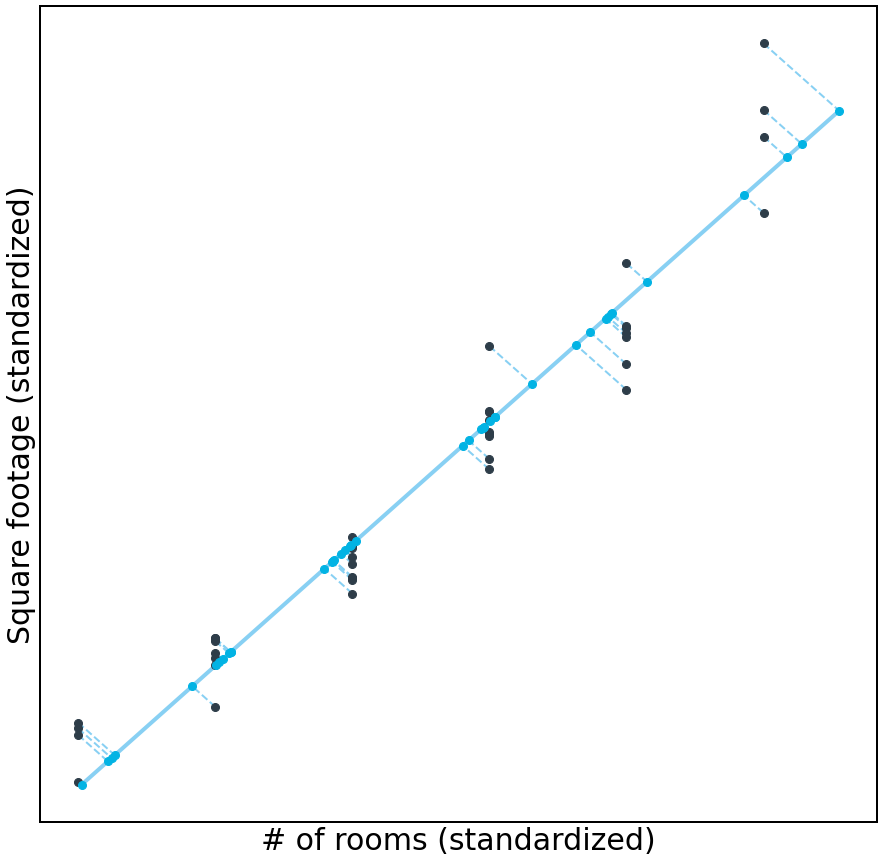

In [18]:
plt.figure(figsize = [15,15])

plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])
plt.plot([X_new[:,0].min(), X_new[:,0].max()],  [X_new[:,1].min(), X_new[:,1].max()],
         '-', c = plot_lcolors[0], lw = 4, zorder = 0)
plt.scatter(X_new[:,0], X_new[:,1], s = 64, c = plot_colors[0])
for x, x_new in zip(X, X_new):
    plt.plot([x[0],x_new[0]], [x[1],x_new[1]], '--', c = plot_lcolors[0], lw = 2, zorder = 0)

plt.xticks([])
plt.yticks([])
plt.xlabel('# of rooms (standardized)', fontsize = 30)
plt.ylabel('Square footage (standardized)', fontsize = 30)
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
# plt.axis('square')
plt.savefig('C09_DimensReduct_02.png', transparent = True)

In [19]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X[:,0].reshape(-1,1),X[:,1])
y_hat = lr_model.predict(X[:,0].reshape(-1,1))

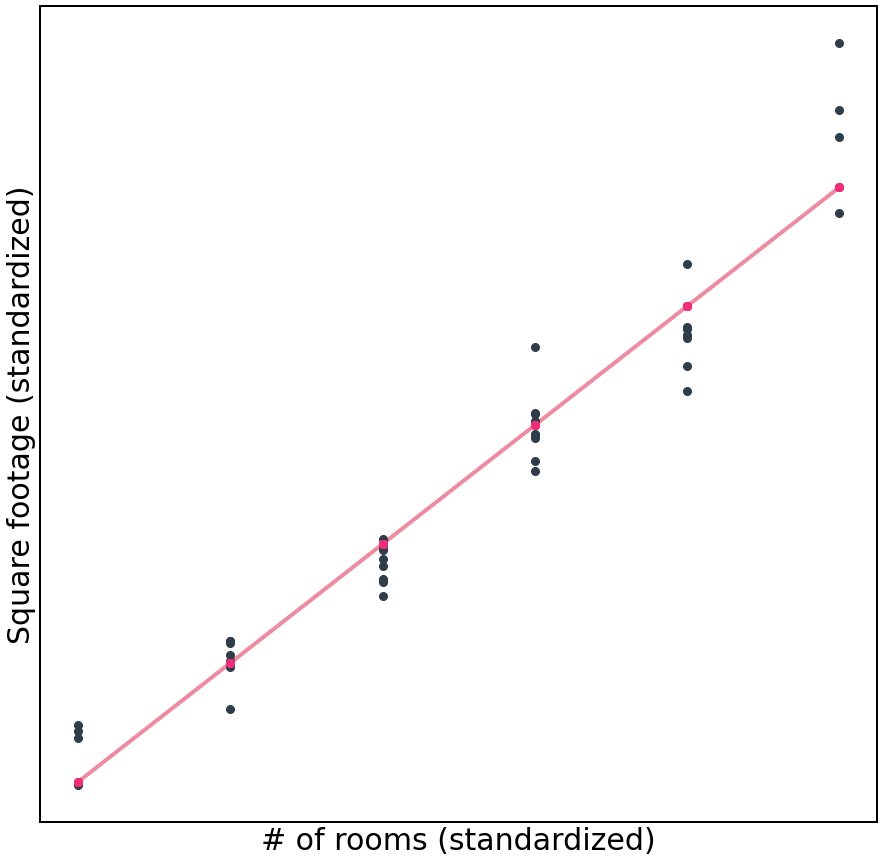

In [20]:
plt.figure(figsize = [15,15])

plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])
plt.plot([X[:,0].min(), X[:,0].max()], [y_hat.min(), y_hat.max()],
         '-', c = plot_lcolors[1], lw = 4, zorder = 0)
plt.scatter(X[:,0], y_hat, s = 64, c = plot_colors[1])

plt.xticks([])
plt.yticks([])
plt.xlabel('# of rooms (standardized)', fontsize = 30)
plt.ylabel('Square footage (standardized)', fontsize = 30)
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
# plt.axis('square')
plt.savefig('C09_DimensReduct_03.png', transparent = True)

## C6.10: PCA Properties

In [21]:
alt_slope = np.array([1.3,1.1])
alt_slope = alt_slope / np.sqrt((alt_slope ** 2).sum())
alt_center = np.array([-.35,-.35])
X_alt = np.matmul( np.dot(X - alt_center, alt_slope).reshape(-1,1), alt_slope.reshape(1,-1) ) + alt_center

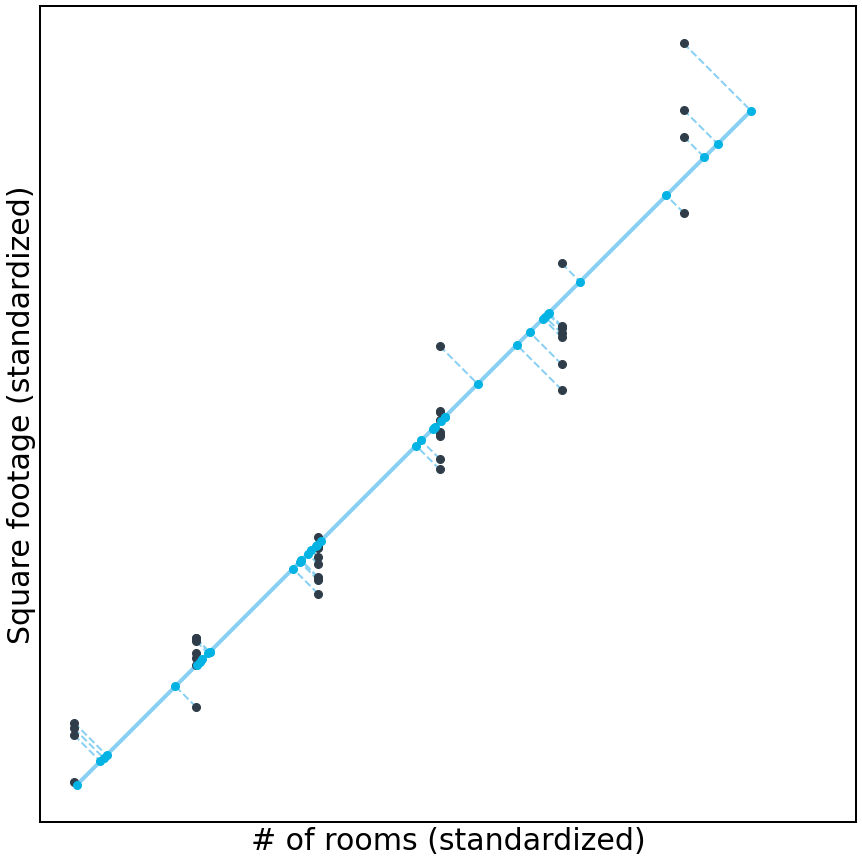

In [22]:
plt.figure(figsize = [15,15])

plt.scatter(X[:,0], X[:,1], s = 64, c = plot_colors[-1])

plt.plot([X_new[:,0].min(), X_new[:,0].max()],  [X_new[:,1].min(), X_new[:,1].max()],
         '-', c = plot_lcolors[0], lw = 4, zorder = 0)
plt.scatter(X_new[:,0], X_new[:,1], s = 64, c = plot_colors[0])
for x, x_new in zip(X, X_new):
    plt.plot([x[0],x_new[0]], [x[1],x_new[1]], '--', c = plot_lcolors[0], lw = 2, zorder = 0)

# plt.plot([X_alt[:,0].min(), X_alt[:,0].max()],  [X_alt[:,1].min(), X_alt[:,1].max()],
#          '-', c = plot_lcolors[1], lw = 4, zorder = 0)
# plt.scatter(X_alt[:,0], X_alt[:,1], s = 64, c = plot_colors[1])
# for x, x_alt in zip(X, X_alt):
#     plt.plot([x[0],x_alt[0]], [x[1],x_alt[1]], '--', c = plot_lcolors[1], lw = 2, zorder = 0)

plt.xticks([])
plt.yticks([])
plt.xlabel('# of rooms (standardized)', fontsize = 30)
plt.ylabel('Square footage (standardized)', fontsize = 30)
ax = plt.gca()
[side.set_linewidth(2) for side in ax.spines.values()]
plt.axis('square')
plt.savefig('C10_PCAProps_04.png', transparent = True)

In [23]:
np.sqrt(((X - X_new) ** 2).sum(axis=1)).sum()

5.283654606306175

In [24]:
np.sqrt(((X - X_alt) ** 2).sum(axis=1)).sum()

5.409010970626955